In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [3]:
Pkg.add(["Plots","Distributions","Optimization","OptimizationOptimJL","Statistics"])

   Resolving package versions...
    Updating `~/Documents/programming/BME-574-2024/Project.toml`
⌅ [7f7a1694] + Optimization v3.26.3
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [5]:
using Plots, Distributions, Optimization, OptimizationOptimJL, Statistics

In [6]:
x = collect(0:10)

11-element Vector{Int64}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [7]:
dist_err = 3.0
nd = Normal(0,dist_err)

Normal{Float64}(μ=0.0, σ=3.0)

In [12]:
y = 3.0 .* x .+ 1.0 .+ rand(nd, length(x))

11-element Vector{Float64}:
 -1.011967224564014
 10.762972688231145
  7.955366258541445
  7.918716687891926
 11.430980778530877
 18.740289352947876
 20.63198112739443
 22.376233167016967
 26.010056534599194
 31.59209530617472
 35.055200649723844

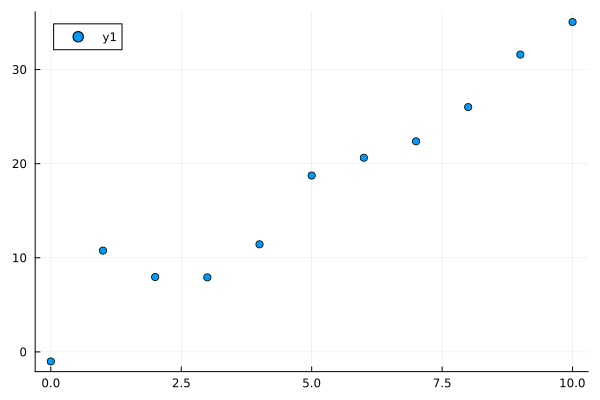

In [13]:
scatter(x,y)

In [19]:
function loss2(u, p)
    return sum((y .- u[1] .* x .- u[2]).^2)
end

loss2 (generic function with 2 methods)

In [20]:
u0 = [0.0, 0.0]

2-element Vector{Float64}:
 0.0
 0.0

In [21]:
optf = OptimizationFunction(loss2)
prob = OptimizationProblem(optf, u0)

OptimizationProblem. In-place: true
u0: 2-element Vector{Float64}:
 0.0
 0.0

In [22]:
sol = solve(prob, Optim.NelderMead())

retcode: Success
u: 2-element Vector{Float64}:
 3.235748989880622
 1.2268838555524795

In [25]:
y_fit = sol.u[1] .* x .+ sol.u[2]

11-element Vector{Float64}:
  1.2268838555524795
  4.4626328454331015
  7.698381835313723
 10.934130825194345
 14.169879815074967
 17.40562880495559
 20.64137779483621
 23.877126784716832
 27.112875774597455
 30.348624764478078
 33.5843737543587

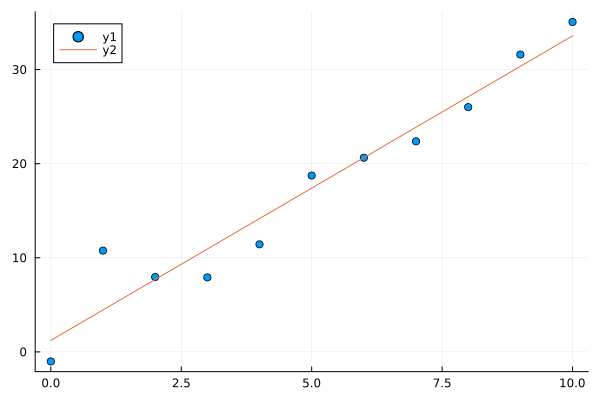

In [26]:
scatter(x,y)
plot!(x,y_fit)

In [27]:
sol.original

 * Status: success

 * Candidate solution
    Final objective value:     7.032692e+01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    55
    f(x) calls:    105
